## Importing Modules

In [1]:
print("Importing Modules...")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Modules Successfully Imported!")

Importing Modules...
Modules Successfully Imported!


## Loading Dataset

In [2]:
print("Loading dataset...")
try:
    data = pd.read_excel("Bird_Strikes_data.xlsx")
except:
    print("Some error occured")
print("Dataset Sucessfully Loaded!")

Loading dataset...
Dataset Sucessfully Loaded!


## Basic Analysis

### Shape of Data

In [3]:
rows, cols = data.shape
print("Number of Rows:", rows)
print("Number of Columns:", cols)

Number of Rows: 25558
Number of Columns: 26


### Basic Information about Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

### Sample of Dataset

In [5]:
data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


### NULL values in each Field

In [8]:
data.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

## Data Filtering

### Extracting Year from `FlightDate`

In [9]:
data["Year"]=data["FlightDate"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

## Analysis

### Yearly Analysis & Bird Strikes in the US

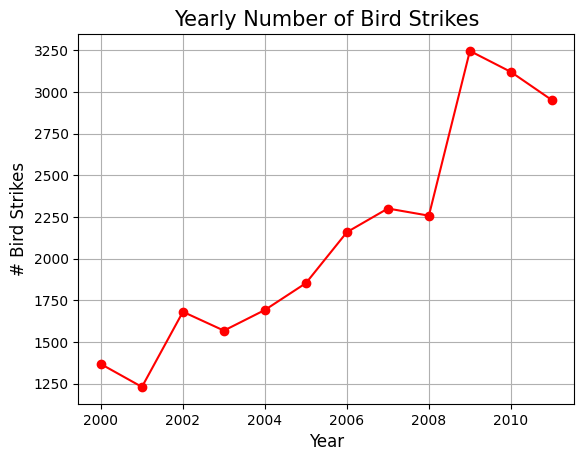

In [10]:
yearly_strikes = data["Year"].value_counts().sort_index()

plt.plot(yearly_strikes.index, yearly_strikes.values, color="r", marker="o")
plt.title("Yearly Number of Bird Strikes", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# Bird Strikes", fontsize=12)
plt.grid(True)
plt.show()

<b>Key Observations :-</b> 
- A clear positive linear relationship between <i>Number of Bird Strikes</i> and <i>Year</i>.
- A sudden peek in year <i>2009<i>

### Top 10 US Airlines in terms of having encountered bird strikes

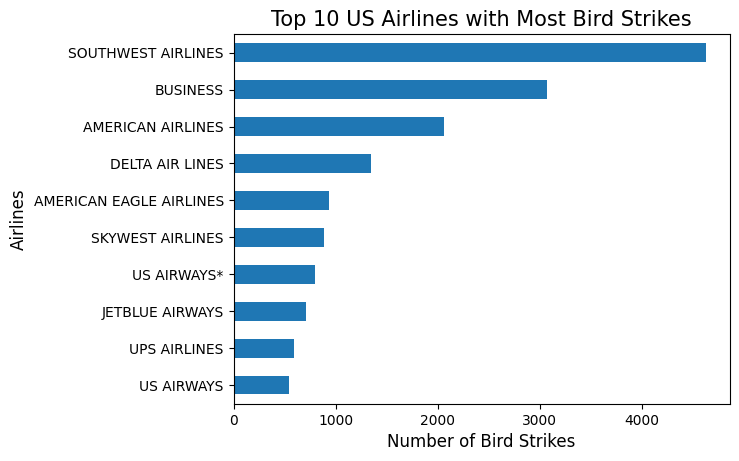

In [11]:
top_airlines = data['Aircraft: Airline/Operator'].value_counts().head(10)

top_airlines.plot(kind='barh')
plt.title("Top 10 US Airlines with Most Bird Strikes", fontsize=15)
plt.xlabel('Number of Bird Strikes', fontsize=12)
plt.ylabel('Airlines', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

<b>Key Observations:-</b>
- <i>SOUTHWEST AIRLINES</i> is reported with most number of Bird stirkes (<i>~4800</i>)
- ...followed by <i>BUSINESS AIRLINES</i> with around <i>3000</i> Bird stirkes

### Airports with most incidents of bird strikes – Top 50

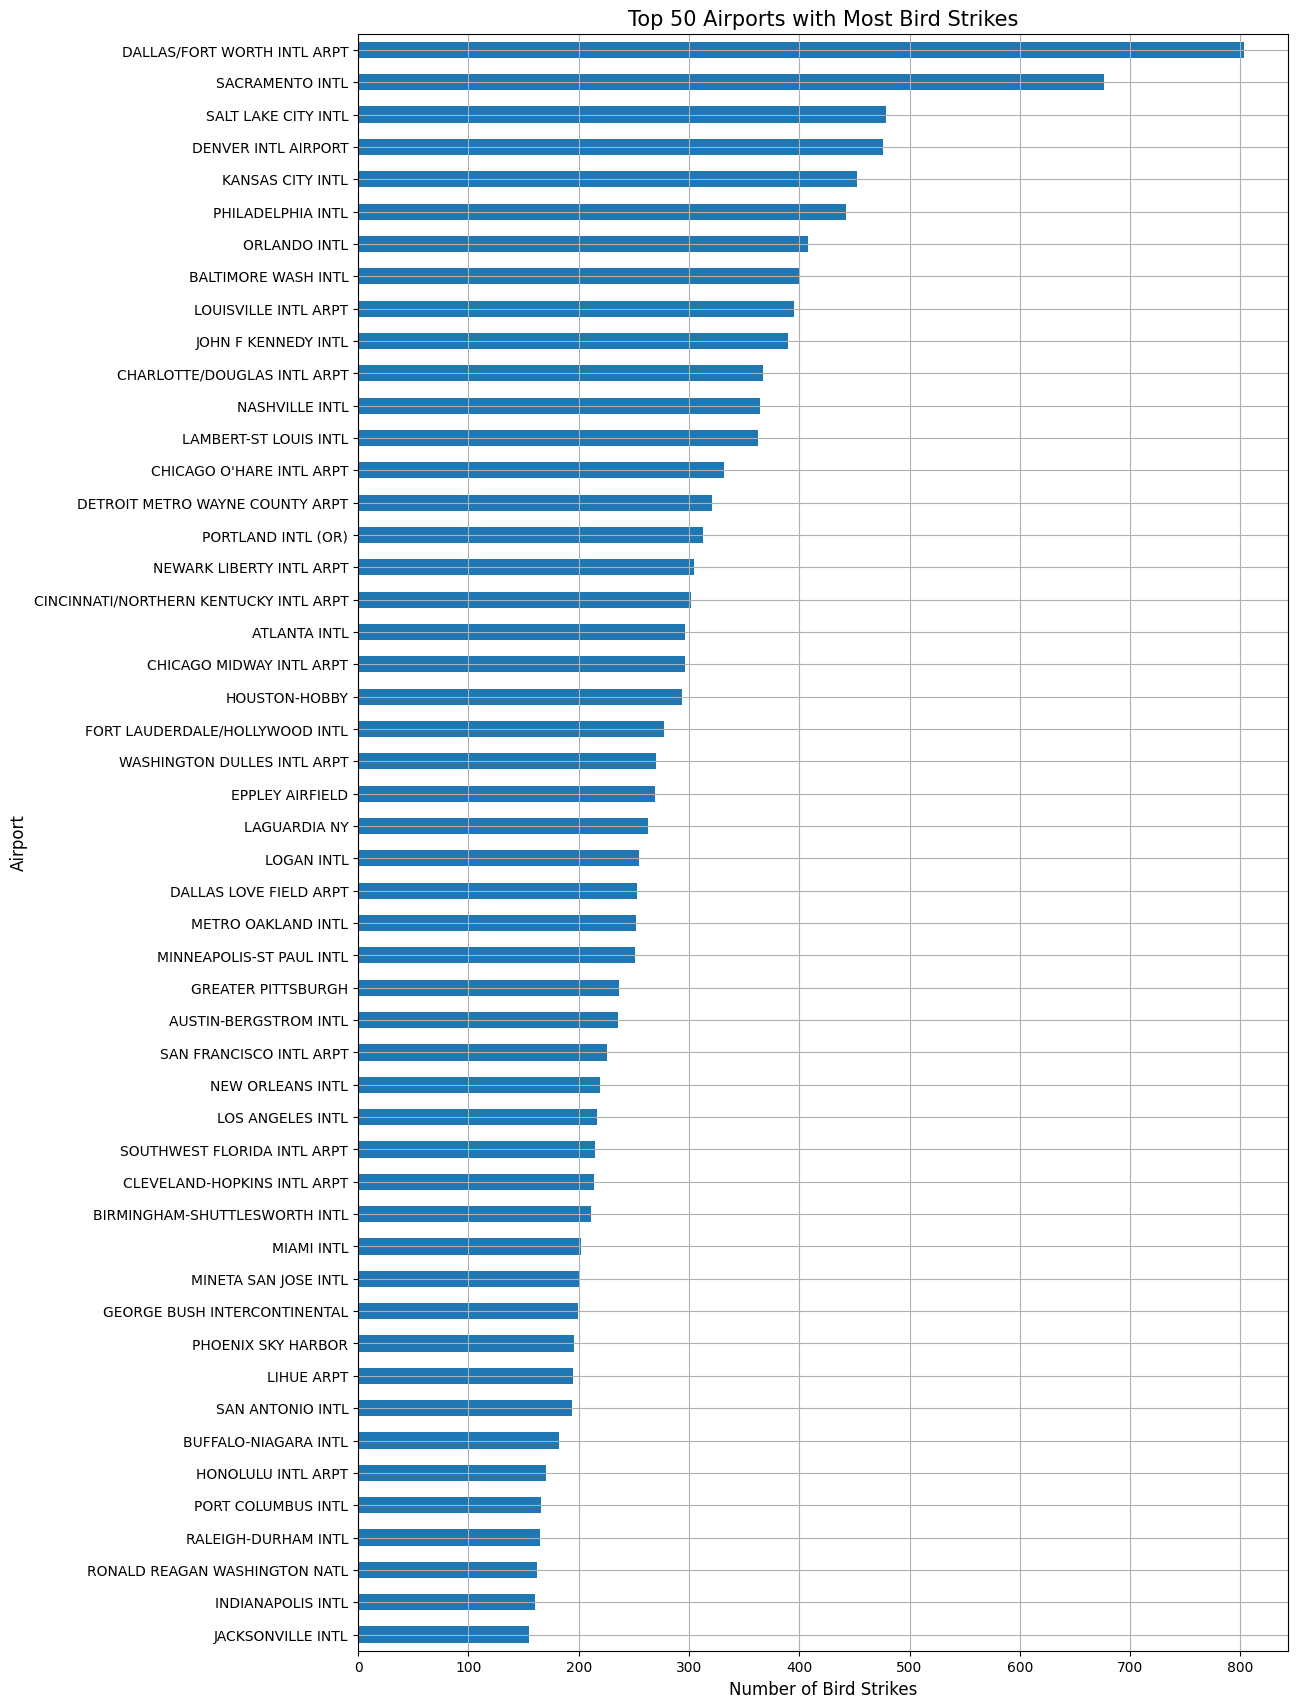

In [12]:
top_airports = data['Airport: Name'].value_counts().head(50)

plt.figure(figsize=(12, 21))
top_airports.plot(kind='barh')
plt.title('Top 50 Airports with Most Bird Strikes', fontsize=15)
plt.xlabel('Number of Bird Strikes', fontsize=12)
plt.ylabel('Airport', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

<b>Key Observations:-</b>
- <i>DALLAS/FORD WORTH INTERNATIONAL AIRPORT</i> has reported most number of bird strikes (<i>~800</i>)
- ...followed by <i>SACRAMENTO INTERNATIONAL AIRPORT</i> with around <i>680</i> reported bird strikes
- 12 Airports have reported bird strikes <i><200</i>
- 32 Airports have reported bird strikes <i><300</i>
- All TOP 50 airports have reported **more than <i>150</i>** bird strikes between year <i>2000-2011</i>

### Yearly Cost Incurred due to Bird Strikes

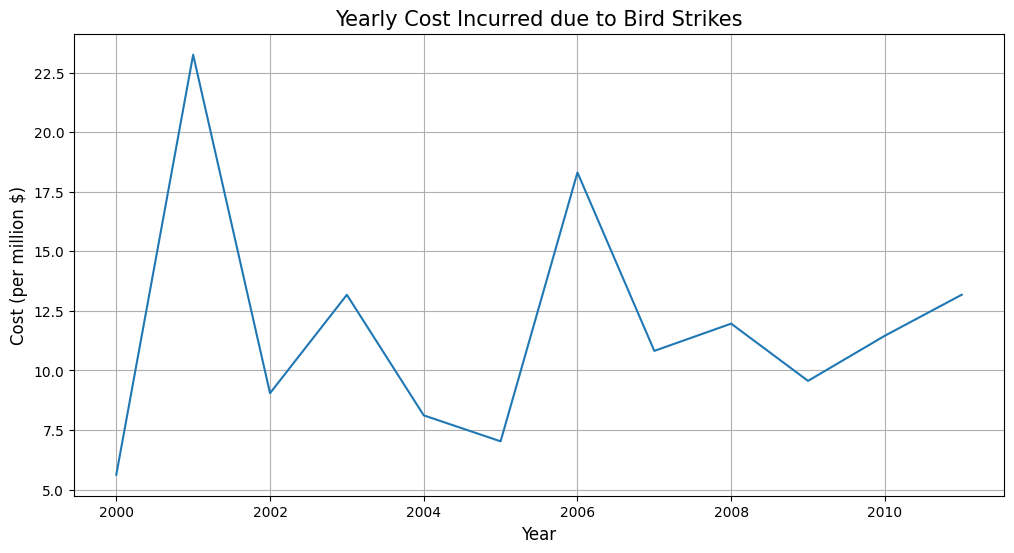

In [13]:
yearly_cost = data.groupby('Year')['Cost: Total $'].sum()/1000000

plt.figure(figsize=(12, 6))
yearly_cost.plot(kind='line')
plt.title('Yearly Cost Incurred due to Bird Strikes', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cost (per million $)', fontsize=12)
plt.grid(True)
plt.show()

<b>Key Observations:-</b>
- Maximum cost incurred due to bird strikes was <i>>$23M</i> in year <i>2001</i> 
- Minimum cost incurred due to bird strikes was <i><$7.5M</i> in year <i>2005</i> 

### When do most bird strikes occur?

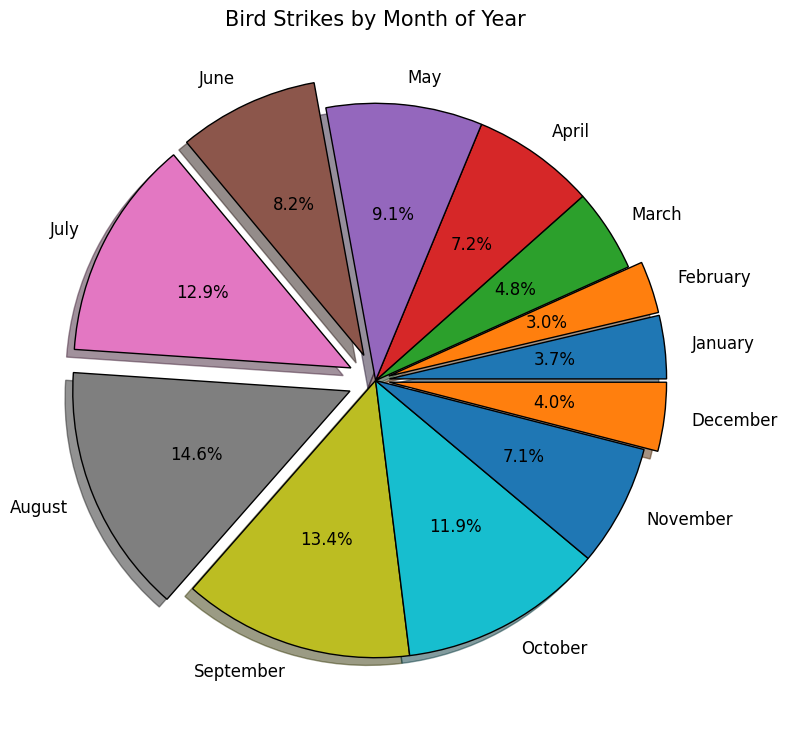

In [14]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

time_of_day_strikes = pd.Categorical(data['FlightDate'].dt.month_name(), 
                               categories=months, 
                               ordered=True
                               ).value_counts()

plt.figure(figsize=(9, 9))
time_of_day_strikes.plot(kind='pie', 
                         autopct='%1.1f%%', 
                         fontsize=12, 
                         shadow=True,
                         # `explode` based on US seasons
                         explode=[0.05,0.05,0,0,0,0.1,0.1,0.1,0,0,0,0.05],
                         wedgeprops = {'linewidth':1,'width':1,'edgecolor':'k'})

plt.title('Bird Strikes by Month of Year', fontsize=15)
plt.ylabel("")
plt.show()

<b>Key Observations:-</b>
- Maximum bird strikes occur in the month of <i>August</i>
- Minimum bird strikes occur in the month of <i>Feburary</i>
- Least bird strikes in **Winter** (<i><11%</i>) 
- Most bird strikes in **Summer & Fall** (<i>>68%</i>) 
- Bird strikes increase as season changes from Winter to Spring

### Altitude of aeroplanes at the time of strike

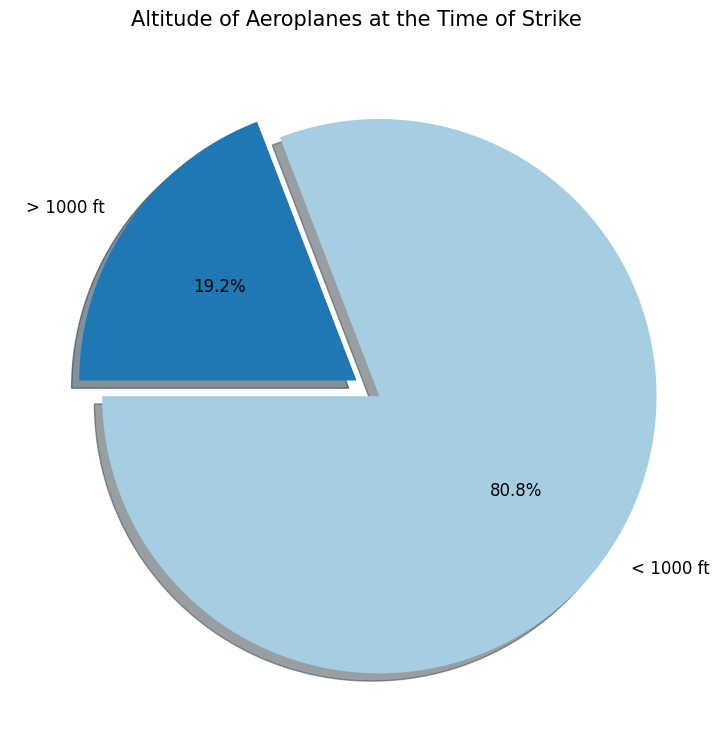

In [15]:
altitude_strikes = data['Altitude bin'].value_counts()

plt.figure(figsize=(9, 9))
altitude_strikes.plot(kind='pie', 
                      autopct='%1.1f%%', 
                      startangle=180, 
                      explode=[0.1,0],
                      fontsize=12,
                      shadow=True,
                      colors=plt.cm.Paired.colors)
plt.title('Altitude of Aeroplanes at the Time of Strike', fontsize=15)
plt.ylabel('')
plt.show()

<b>Key Observations:-</b>
- Every **4 out of 5** Bird strikes are reported <i>below 1000ft</i>
- Only 1/5<sup>th</sup> of bird strikes occur <i>above 1000ft</i>

### Phase of flight at the time of the strike

In [16]:
phase_of_flight = data['When: Phase of flight'].value_counts()
print(phase_of_flight)

When: Phase of flight
Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: count, dtype: int64


There are negligible bird strikes in phases of <i>Taxi</i> and <i>Parked</i>, so we'll ignore them while plotting the chart

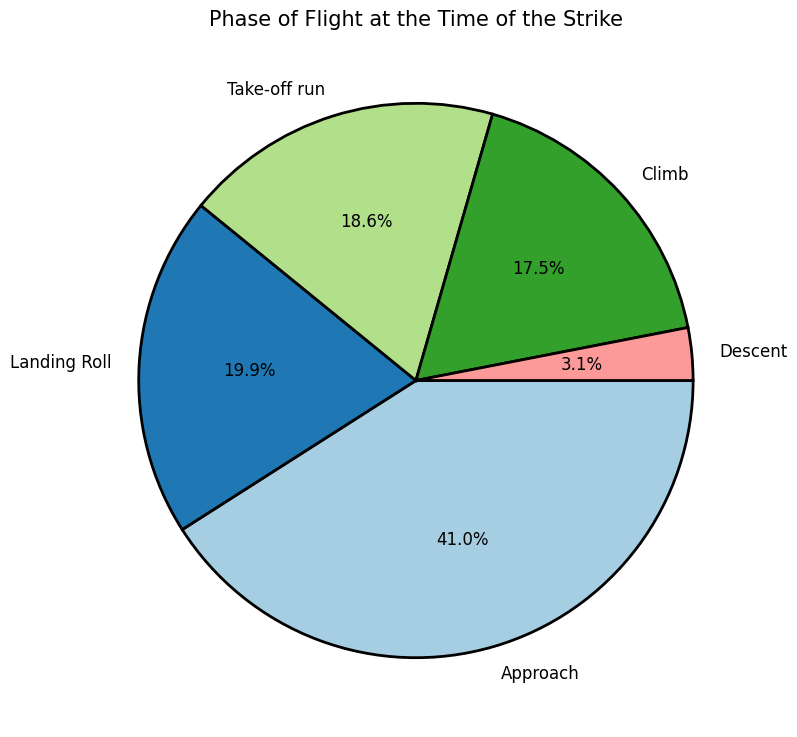

In [17]:
plt.figure(figsize=(9, 9))
phase_of_flight[:-2].plot(kind='pie', 
                     autopct='%1.1f%%', 
                     fontsize=12,
                     colors=plt.cm.Paired.colors,
                     wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'}
                     )
plt.title('Phase of Flight at the Time of the Strike', fontsize=15)
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

<b>Key Observations:-</b>
- Most of the bird strikes occur in <i>**Approch**</i> phase (**>40%**)
- Negligible bird strikes in phases of <i>Taxi</i> and <i>Parked</i> (~1%)

### Average Altitude of the aeroplanes in different phases at the time of strike

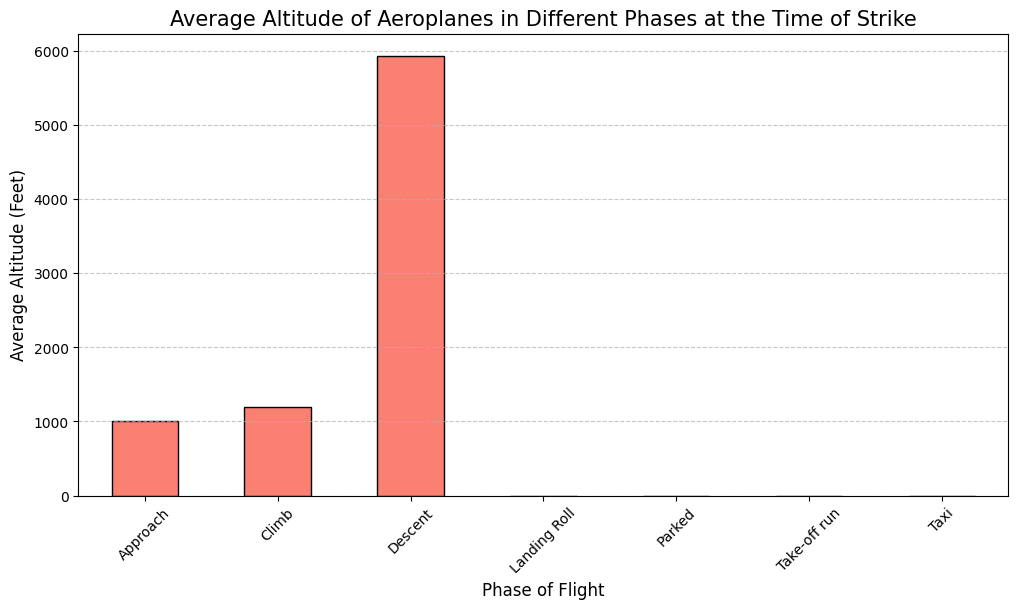

In [18]:
average_altitude_phase = data.groupby('When: Phase of flight')['Feet above ground'].mean()

plt.figure(figsize=(12, 6))
average_altitude_phase.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Altitude of Aeroplanes in Different Phases at the Time of Strike', fontsize=15)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Average Altitude (Feet)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Effect of Bird Strikes & Impact on Flight

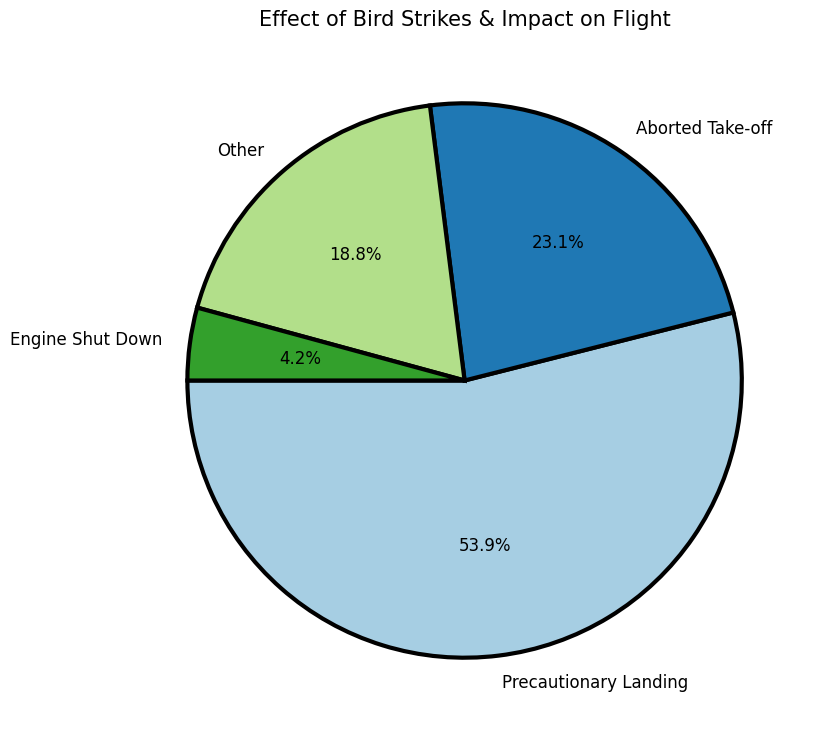

In [19]:
effect_on_flight = data['Effect: Impact to flight'].value_counts()

plt.figure(figsize=(9, 9))
effect_on_flight.plot(kind='pie', 
                      autopct='%1.1f%%', 
                      startangle=180, 
                      fontsize=12,
                      colors=plt.cm.Paired.colors,
                      wedgeprops = {'linewidth':3,'width':1,'edgecolor':'k'}
                      )

plt.title('Effect of Bird Strikes & Impact on Flight', fontsize=15)
plt.ylabel('')
plt.show()


<b>Key Observations:-</b>
- More than <i>50%</i> time, <i>Precautionary landing</i> needs to be done
- Bird stikes even causes <i>Engine Shut Down</i> (<i>~4.2</i>)
- About <i>23%</i> times Take-offs were aborted due to bird strikes

### Were Pilots Informed?

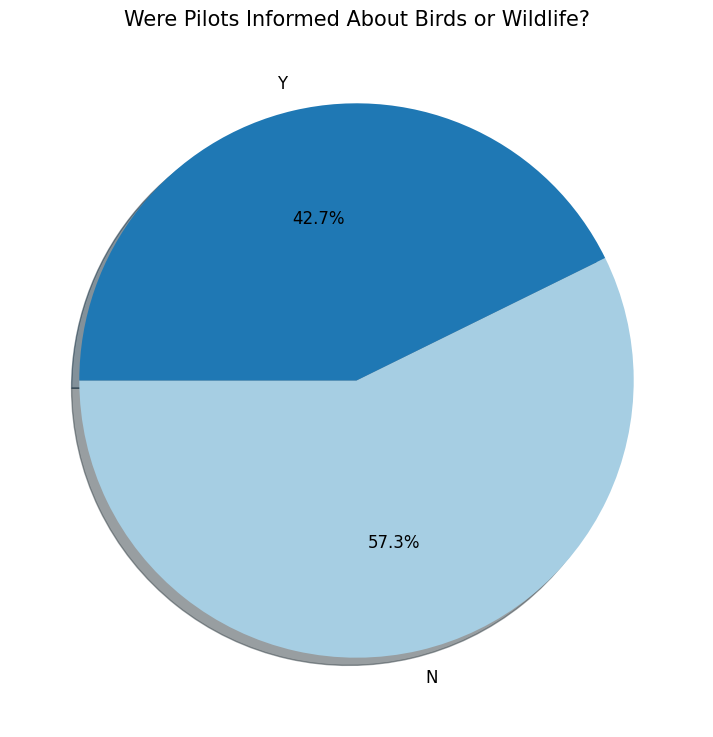

In [20]:
# Were pilots informed? & Prior warning and effect of strike relation
pilot_informed = data['Pilot warned of birds or wildlife?'].value_counts()

plt.figure(figsize=(9, 9))
pilot_informed.plot(kind='pie', 
                    autopct='%1.1f%%', 
                    startangle=180, 
                    fontsize=12,
                    shadow=True,
                    colors=plt.cm.Paired.colors)
plt.title('Were Pilots Informed About Birds or Wildlife?', fontsize=15)
plt.ylabel('')
plt.show()

<b>Key Observation:-</b>
- Most of the time pilots are not informed about birds/wildlife

### Prior Warning and Effect of Strike Relation

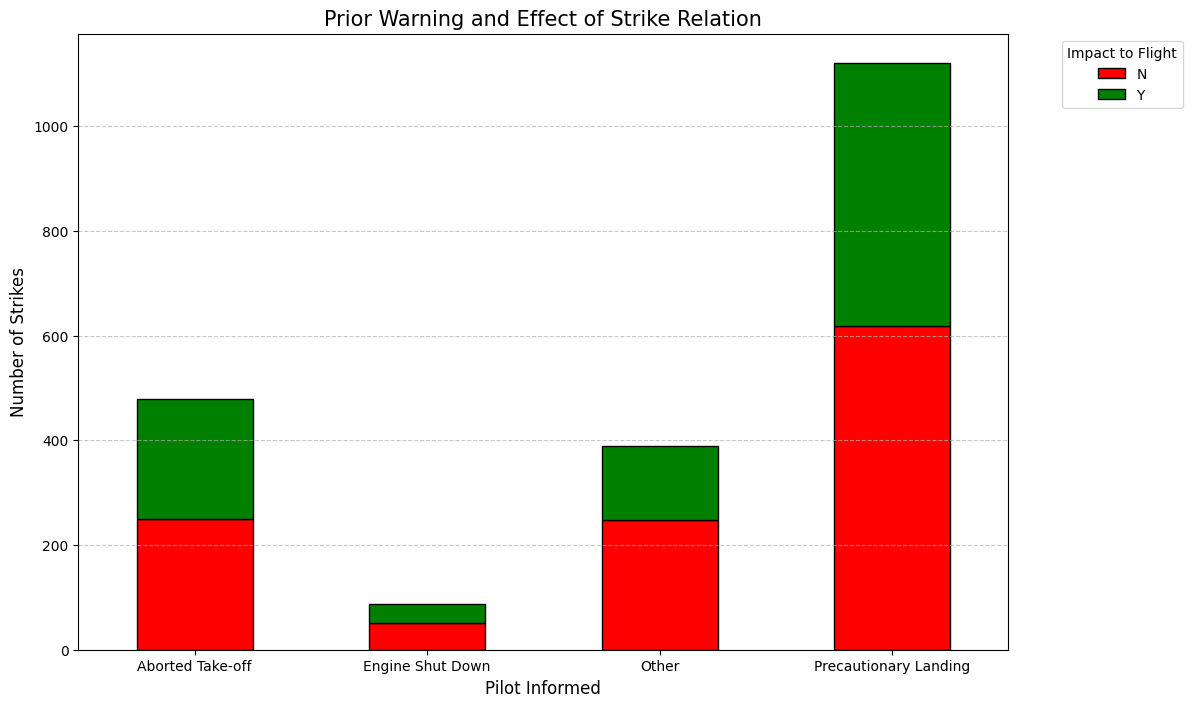

In [21]:
warning_effect_relation = data.groupby('Effect: Impact to flight')['Pilot warned of birds or wildlife?'].value_counts().unstack()

warning_effect_relation.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'], edgecolor='black')
plt.title('Prior Warning and Effect of Strike Relation', fontsize=15)
plt.xlabel('Pilot Informed', fontsize=12)
plt.ylabel('Number of Strikes', fontsize=12)
plt.legend(title='Impact to Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()